### Project 3
##### CSE 402
##### Rajaditya Shrikishan Bajaj

In [1]:
!pip install matlab

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter, ImageOps, ImageEnhance
from skimage import feature
import pandas as pd
import cv2
import matlab

**Question 1**

**Part (a)**

In [3]:
img = Image.open('cropped_selfie.jpg')
f_array = {}

In [4]:
# resizing the image to 100x100 pixel
img = img.resize((100, 100), Image.ANTIALIAS)
img.save('resized_image.jpg')

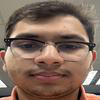

In [5]:
# opening the 100x100 pixel image
img = Image.open('resized_image.jpg')
img

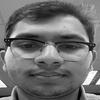

In [6]:
# converting the image to grayscale
grayscale_img = img.convert('L')
grayscale_img_array = np.array(grayscale_img)
f_array["Fo"] = grayscale_img_array
grayscale_img

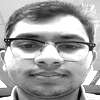

In [7]:
# a) Increasing brightness of the image
enhancer = ImageEnhance.Brightness(grayscale_img)
factor = 1.5 #brightens the image
bright_img = enhancer.enhance(factor)
bright_img_array = np.array(bright_img)
f_array["Fb"] = bright_img_array
bright_img

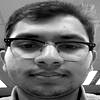

In [8]:
# b) Increasing contrast of the image
#image brightness enhancer
contrast_enhancer = ImageEnhance.Contrast(grayscale_img)
factor = 1.25 #increase contrast
contrast_img = contrast_enhancer.enhance(factor)
contrast_img_array = np.array(contrast_img)
f_array["Fc"] = contrast_img_array
contrast_img

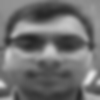

In [9]:
#c) Smoothening the image using Gaussian Filter
# Blurring image by sending the ImageFilter.
# GaussianBlur predefined kernel argument
gaussian_img = grayscale_img.filter(ImageFilter.GaussianBlur)
gaussian_img_array = np.array(gaussian_img)
f_array["Fg"] = gaussian_img_array
gaussian_img

**Part (b)**

In [10]:
# Code taken from https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python

def get_pixel(img, center, x, y): 
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass  
    return new_value
  
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y): 
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y-1))
    val_ar.append(get_pixel(img, center, x-1, y))
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    val_ar.append(get_pixel(img, center, x, y + 1))
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    val_ar.append(get_pixel(img, center, x + 1, y))
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    val_ar.append(get_pixel(img, center, x, y-1))
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]      
    return val

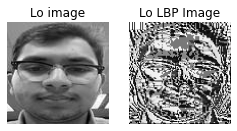

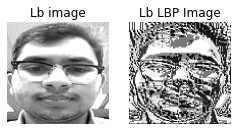

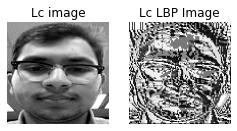

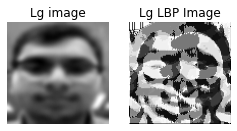

In [11]:
paths = {'Lo': [grayscale_img_array, grayscale_img], 'Lb': [bright_img_array, bright_img], 
         'Lc': [contrast_img_array, contrast_img], 'Lg': [gaussian_img_array, gaussian_img]}
lbp_array = {}
original_array = {}
for path in paths:
    width, height = paths[path][1].size
    
    img_lbp = np.zeros((height, width), np.uint8)

    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(paths[path][0], i, j)
    lbp_array[path] = img_lbp
    
    fig = plt.figure(figsize=(4, 5))

    rows = 1
    columns = 2
    
    fig.add_subplot(rows, columns, 1)
    
    original_img = paths[path][1]
    gray_img = original_img.convert('L')
    plt.imshow(gray_img, cmap="gray")
    plt.axis('off')
    plt.title(path+" image")

    fig.add_subplot(rows, columns, 2)

    plt.imshow(img_lbp, cmap="gray")
    plt.axis('off')
    plt.title(path + " LBP Image")

**Part (c)**

In [12]:
def comparator(x1,x2):
    difference = x2 - x1
    absolute = np.absolute(difference)
    pixel_sum = np.sum(absolute)
    shape = np.shape(difference)
    output = pixel_sum/(shape[0]*shape[1])
    return output

In [13]:
for lbp in lbp_array:
    if lbp == "Lo":
        continue
    else:
        score = comparator(lbp_array[lbp], lbp_array["Lo"])
        print_str = f'The difference between Lo and {lbp} is {round(score,2)}'
        print(print_str)

The difference between Lo and Lb is 17.69
The difference between Lo and Lc is 3.12
The difference between Lo and Lg is 106.62


**Part (d)**

In [14]:
for f in f_array:
    if f == "Fo":
        continue
    else:
        score = comparator(f_array[f], f_array["Fo"])
        print_str = f'The difference between Fo and {f} is {round(score,2)}'
        print(print_str)

The difference between Fo and Fb is 205.05
The difference between Fo and Fc is 114.47
The difference between Fo and Fg is 120.08


**Question 2**

In [15]:
# Loading the image
top_thirty_image_list = []
for i in range(1, 11):
    for j in range(1, 4):
        input_path = f'Q2_images/user{i:02}_{j:02}.bmp'
        img = np.asarray(Image.open(input_path))
        top_thirty_image_list.append(img.flatten())

**Part (a)**

In [16]:
# calculating the mean array
sum_i = 0
d = len(top_thirty_image_list[0])
mean_list = []
for i in range(d):
    for j in top_thirty_image_list:
        sum_i += j[i]
    mean_list.append(sum_i/30)
    sum_i = 0
len(mean_list)
mean_list = np.array(mean_list)

Text(0.5, 1.0, 'Mean Face')

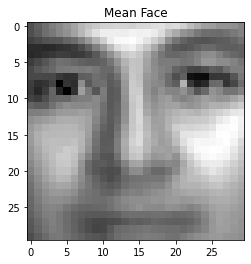

In [17]:
mean_img = mean_list.reshape(30, 30)
plt.imshow(mean_img, cmap="gray")
plt.title("Mean Face")

In [18]:
# Getting the data matrix
X = []
for i in top_thirty_image_list:
    i = np.array(i)
    x = i - mean_list
    X.append(x)
X = np.array(X)
X = X.T

In [19]:
# Getting the covariance matrix
C = np.dot(X, X.T)

In [20]:
# Getting the eigenvalue and eigenvector
eigval, eigvec = np.linalg.eig(C)

In [21]:
w, v = eigval, eigvec
w = w.real
idx = np.argsort(w)[-50:][::-1]
w = w[idx]
v = v[:,idx].real
v.shape

(900, 50)

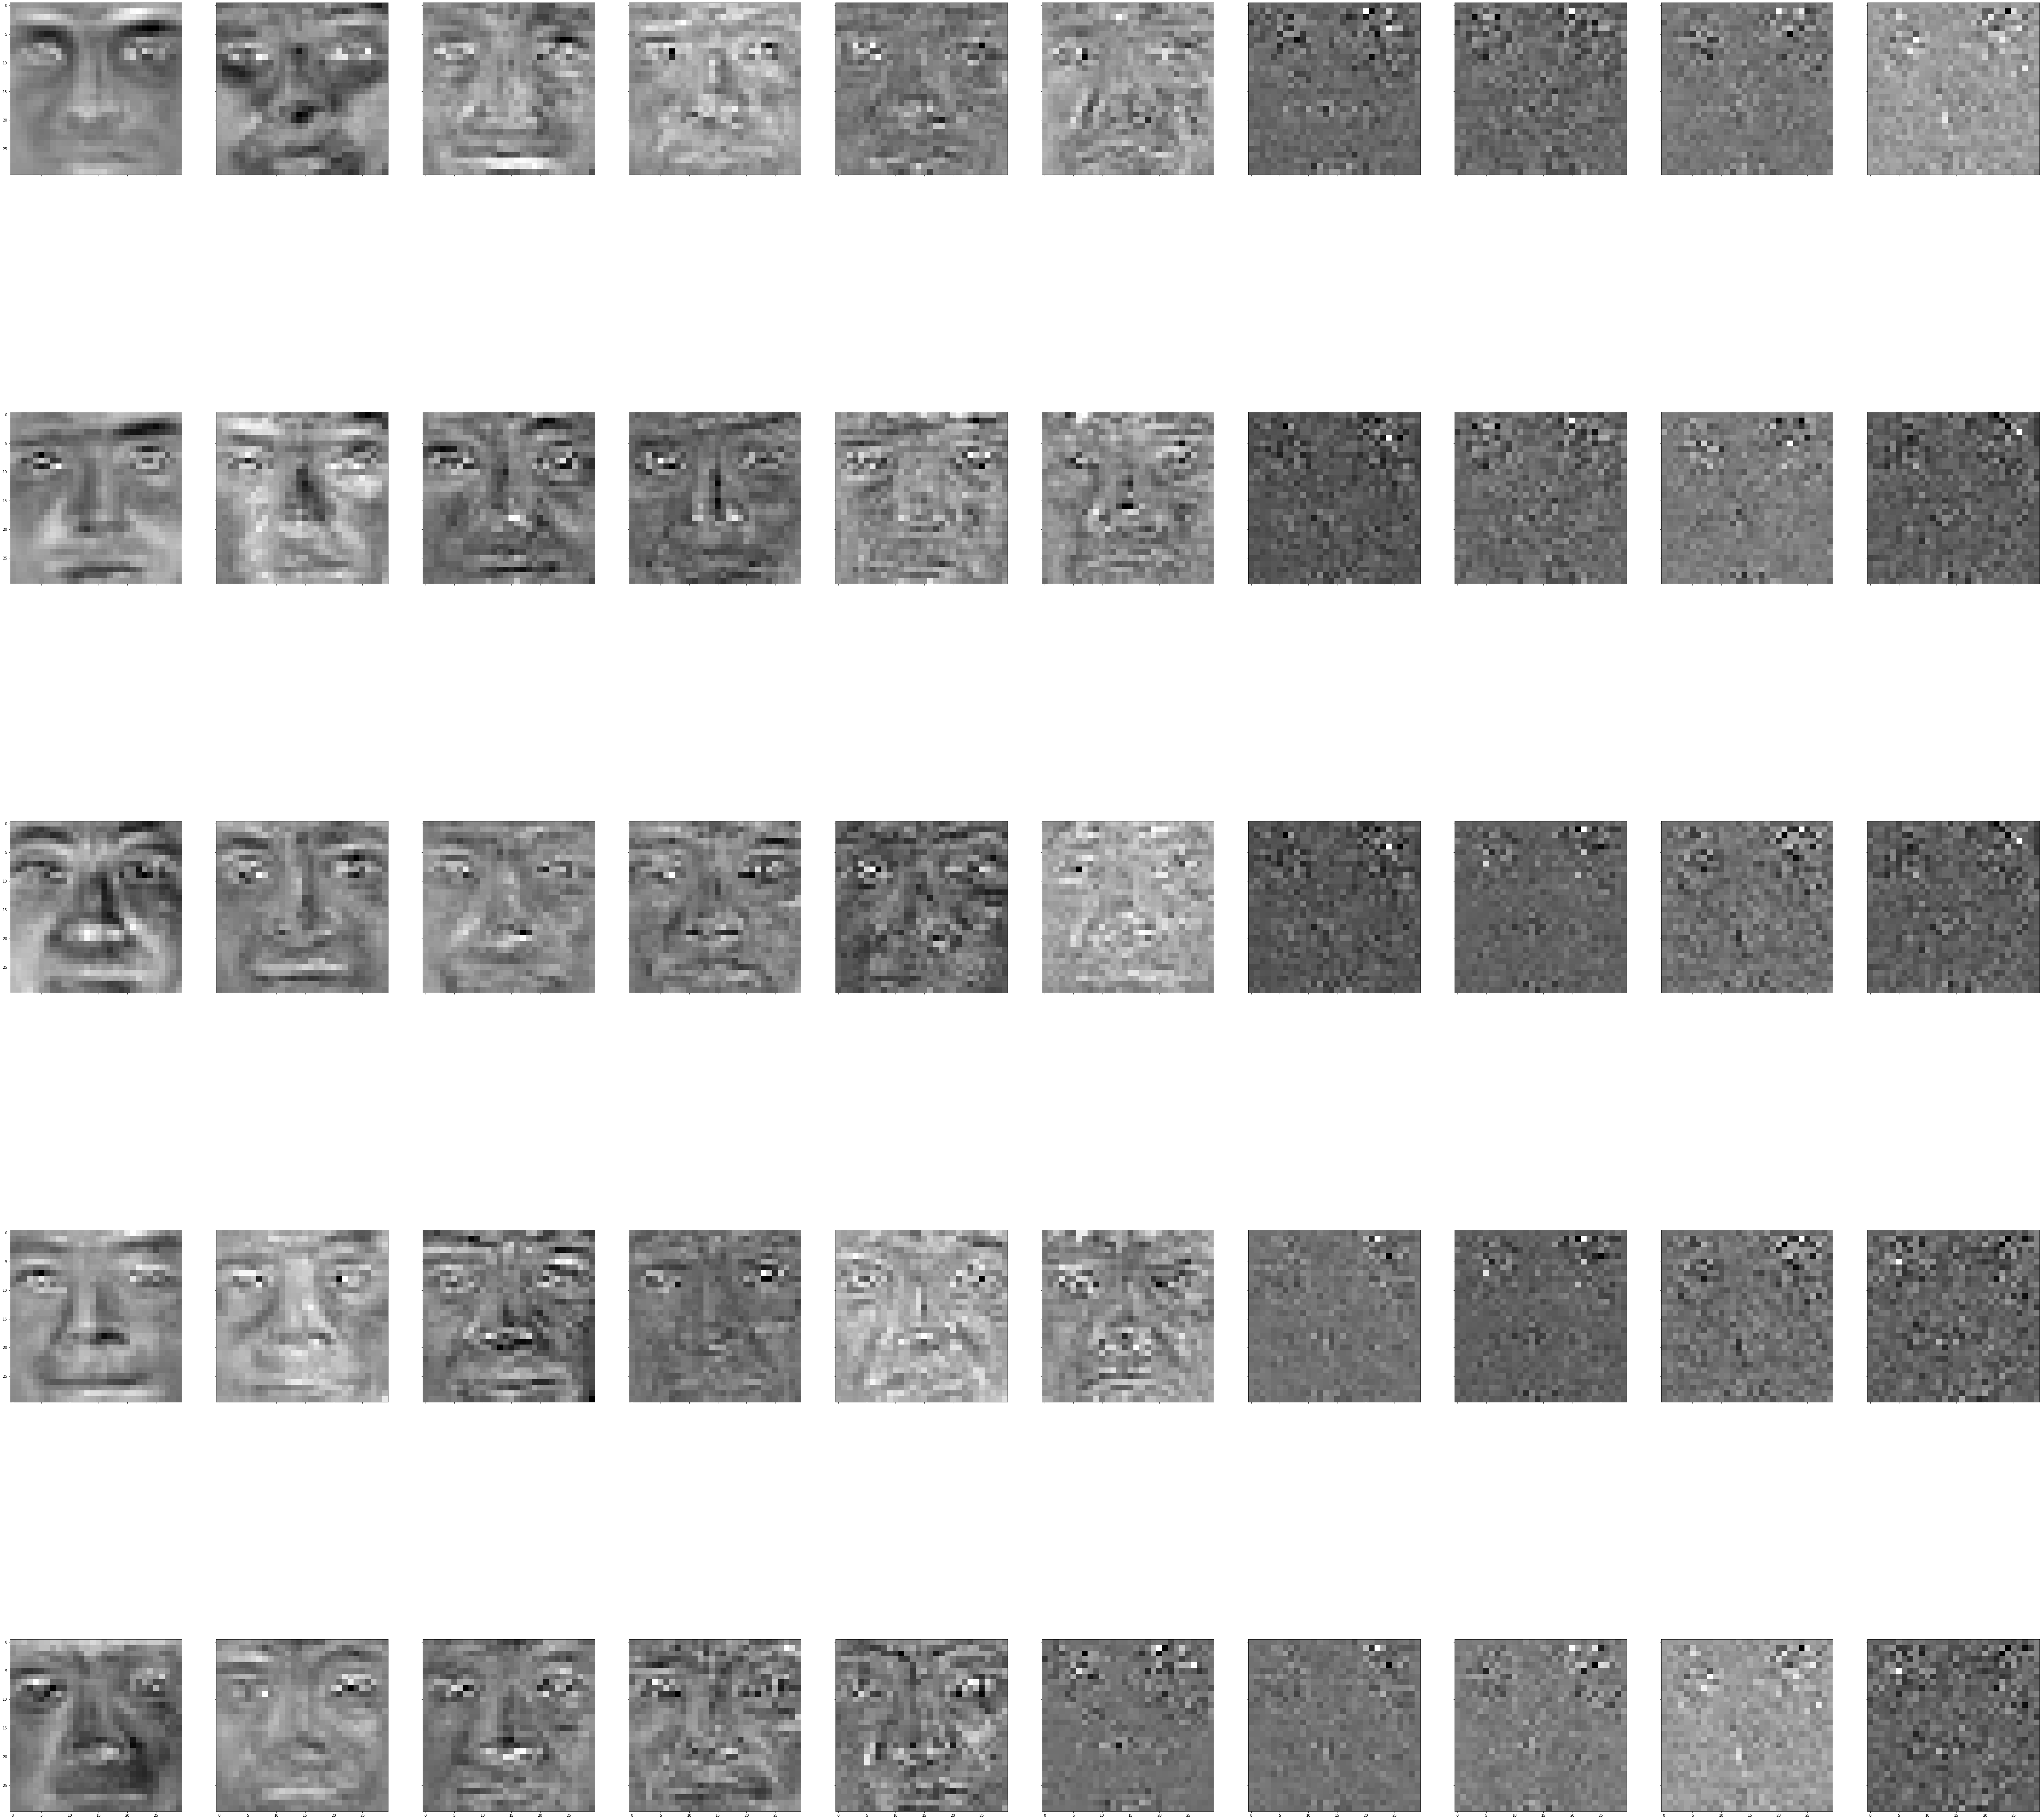

In [22]:
fig, axes = plt.subplots(5,10,sharex=True,sharey=True,figsize=(100,100))
for i in range(50):
    axes[i%5][i//5].imshow((v[:,i].reshape(30,30)), cmap="gray")

In [23]:

all_img_list = []
for i in range(1, 11):
    for j in range(1, 6):
        input_path = f'Q2_images/user{i:02}_{j:02}.bmp'
        img = np.asarray(Image.open(input_path))
        all_img_list.append(img.flatten())


In [24]:
def top_eigenvalue_eigenvector(x):
    w, v = eigval, eigvec
    w = w.real
    idx = np.argsort(w)[-x:][::-1]
    w = w[idx]
    v = v[:,idx].real
    return w, v

In [25]:
def get_eigencoefficients(v):
    eigen_coefficients = []

    for i in all_img_list:
        eig_coff = np.dot(v.T, i-mean_list)
        eig_coff = np.array(eig_coff)
        eigen_coefficients.append(eig_coff)
    eigen_coefficients = np.array(eigen_coefficients)
    return eigen_coefficients

In [26]:
def generate_score(x):
    w, v = top_eigenvalue_eigenvector(x)
    
    eigen_coefficients = get_eigencoefficients(v)
        
    genuine_list = []
    imposter_list = []

    for i in range(len(eigen_coefficients)):
        for j in range(len(eigen_coefficients)):
            diff = eigen_coefficients[i] - eigen_coefficients[j]
            absolute = np.abs(diff)
            compare_value = pow(absolute, 2)
            compare_value = np.sum(compare_value)
            if (i//5) == (j//5):
                genuine_list.append(compare_value)
            else:
                imposter_list.append(compare_value)
    
    return genuine_list, imposter_list

**Part (b)**

In [27]:
print("The eigencoefficients shape for top 50 eigen faces is:", get_eigencoefficients(top_eigenvalue_eigenvector(50)[1]).shape)
print("The eigencoefficients for the top 50 eigen faces is:")
print(get_eigencoefficients(top_eigenvalue_eigenvector(50)[1]))

The eigencoefficients shape for top 50 eigen faces is: (50, 50)
The eigencoefficients for the top 50 eigen faces is:
[[-1.65062019e+02  5.59122139e+01  3.87395719e+02 ... -2.42028619e-14
  -1.40720768e-14 -9.18709553e-15]
 [-2.38963202e+02  3.24997001e+01  3.39177800e+02 ... -9.76996262e-15
  -2.10872986e-14 -1.35377820e-14]
 [-2.33919502e+02  6.66753226e+01  2.12357545e+02 ... -1.42108547e-14
  -3.49720253e-14 -3.46944695e-14]
 ...
 [-2.73088075e+01 -1.27073964e+02 -2.17346337e+02 ...  1.73194792e-14
  -4.44644321e-14 -4.26880753e-14]
 [-1.17533676e+02 -2.20917908e+02 -1.14223688e+02 ...  1.86027175e+01
   5.32244352e+00  5.32244352e+00]
 [ 3.01187930e+01  6.30648527e+01 -9.44768720e+01 ... -1.16362466e+01
   1.72964442e+00  1.72964442e+00]]


**Part (c)**

In [28]:
x, y = generate_score(50)

Text(0.5, 1.0, 'Histogram of Genuine and Impostor Score Distribution for top 50 eigenfaces')

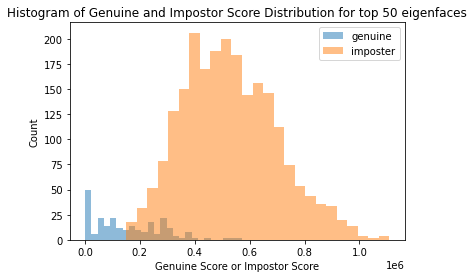

In [29]:
plt.hist(x, bins = 25, label = 'genuine', alpha = 0.5)
plt.hist(y, bins = 25, label = 'imposter', alpha = 0.5)
plt.xlabel('Genuine Score or Impostor Score')
plt.ylabel('Count')
plt.legend()
plt.title("Histogram of Genuine and Impostor Score Distribution for top 50 eigenfaces")

**Part (d)**

In [30]:
np.savetxt("50_genuine_scores.mat", x)
np.savetxt("50_imposter_scores.mat", y)


**Part (e)**

In [31]:
given_value = [10, 20, 40]

for i in given_value:
    xi, yi = generate_score(i)
    file_x = str(i)+"_genuine_scores.mat"
    file_y = str(i)+"_imposter_scores.mat"
    
    np.savetxt(file_x, xi)
    np.savetxt(file_y, yi)

**Question 3**

In [32]:
image_list = ["Q3_frontal_images/IMG-1984.jpg", "Q3_frontal_images/IMG-1985.jpg", "Q3_frontal_images/IMG-1986.jpg", 
              "Q3_frontal_images/IMG-1987.jpg", "Q3_frontal_images/IMG-1988.jpg", "Q3_frontal_images/IMG-1989.jpg",
              "Q3_frontal_images/IMG-1990.jpg", "Q3_frontal_images/IMG-1991.jpg", "Q3_frontal_images/IMG-1992.jpg", 
              "Q3_frontal_images/IMG-1993.jpg"]

In [33]:
image_upload_array = []
# resizing the image to 30x30 pixel
for i in image_list:
    img = Image.open(i)
    img = img.resize((30, 30), Image.ANTIALIAS)
    image_upload_array.append(img)

In [34]:
grayscale_img_flatten_list = []
grayscale_img_array_list = []

for i in image_upload_array:
    grayscale_img = i.convert('L')
    grayscale_img_array = np.array(grayscale_img)
    grayscale_img_flatten_list.append(np.asarray(grayscale_img).flatten())
    grayscale_img_array_list.append(grayscale_img_array)

**Part (a)**

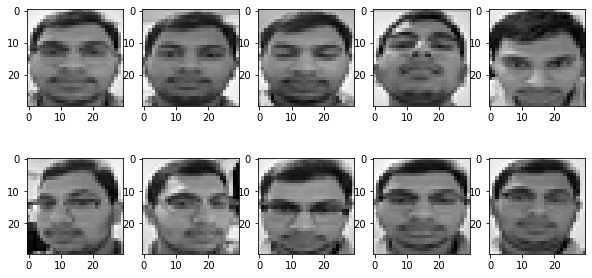

In [35]:
fig = plt.figure(figsize=(10, 5))

rows = 2
columns = 5

for i, j in enumerate(grayscale_img_array_list):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(j, cmap="gray")

**Part (b)**

In [36]:

q3_w, q3_v = top_eigenvalue_eigenvector(25)

q3_eigen_coefficients = []

for i in grayscale_img_flatten_list:
    eig_coff = np.dot(q3_v.T, i-mean_list)
    eig_coff = np.array(eig_coff)
    q3_eigen_coefficients.append(eig_coff)

In [37]:
print("The eigen coefficients for the 10 faces using the top 25 eigen values are:")
print(q3_eigen_coefficients)

The eigen coefficients for the 10 faces using the top 25 eigen values are:
[array([ 178.18581168,    2.23108045,  -50.47417833, -385.0379126 ,
        168.81876557,  206.59101209, -173.52793497,  181.05960157,
       -118.45654213,   -5.44607399,  -39.43965191,  -90.28032362,
         95.52272708, -212.8457711 ,  -15.51238425,  -79.19152201,
        107.39850095,  -16.81737888,  -26.01129593,  -55.14525153,
         36.51939182,  -81.90231818,  -27.56734948, -179.40900075,
        -34.54567818]), array([ 210.60604308,  154.53213241,   68.73646413, -281.71592118,
        236.4654969 ,  132.53059696, -148.9153918 ,  139.31483883,
        -95.13052732, -131.96929217,  -91.36560589,   -7.53669942,
        158.25165621, -168.31163347, -109.95406014,  -28.98550684,
        154.67350266,  -57.30792356,   61.17942887,  -31.31152929,
         42.23453005,  -85.28219174,  -45.97093741, -105.61757229,
        -41.60362841]), array([ 226.44371768,  153.6890822 ,    2.88930821, -272.54594663,
     

**Part (c)**

In [38]:
q3_genuine_score = []

for i in range(10):
    for j in range(i+1,10):
        diff = q3_eigen_coefficients[i] - q3_eigen_coefficients[j]
        xsqr = np.square(diff)
        q3_genuine_score.append(np.sum(xsqr))

In [39]:
print("The Genuine score list for the face matcher is:")
print(q3_genuine_score)
print()
print("The length of the genuine score list is:", len(q3_genuine_score))

The Genuine score list for the face matcher is:
[122918.28945762872, 88324.76133626979, 330707.7967596474, 385442.53829782415, 232252.65683443574, 316195.5371410092, 141412.26515191153, 133891.50252181082, 100105.55545175697, 52220.345554301384, 336134.91787073965, 277957.15521987446, 371929.38477825985, 158388.5778749826, 82025.26354218602, 162173.17879539105, 138841.61103070242, 408874.4691442219, 277197.5736146256, 375746.19547204796, 256658.80686525814, 75560.11404304762, 145425.78315498255, 96698.6455238593, 571507.3856773163, 419707.03383876145, 387018.41175435646, 517616.5627030137, 410414.8240674021, 268380.79155554017, 461301.68889741704, 231517.96943380378, 205103.58245987789, 282802.87997129414, 441431.4618504722, 448768.4493579388, 340408.80326367443, 364531.46227667603, 409657.30082312936, 242429.84109810574, 216181.7516205222, 346822.8991253967, 179755.78826804858, 200399.47886335955, 175286.4689206561]

The length of the genuine score list is: 45


**Part (d)**

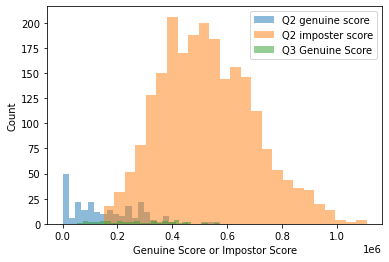

In [40]:
plt.hist(x, bins=25, label='Q2 genuine score', alpha=0.5)
plt.hist(y, bins=25, label='Q2 imposter score', alpha=0.5)
plt.hist(q3_genuine_score, bins=25, label="Q3 Genuine Score", alpha=0.5)
plt.xlabel('Genuine Score or Impostor Score')
plt.ylabel('Count')
plt.legend()
plt.show()

**Question 4**

**Part (a)**

In [41]:
q4_image_list = ["Q4_Non_Frontal_images/IMG-1995.jpg", "Q4_Non_Frontal_images/IMG-1996.jpg", 
                 "Q4_Non_Frontal_images/IMG-1997.jpg", "Q4_Non_Frontal_images/IMG-1998.jpg", 
                 "Q4_Non_Frontal_images/IMG-1999.jpg", "Q4_Non_Frontal_images/IMG-2001.jpg",
                 "Q4_Non_Frontal_images/IMG-2002.jpg", "Q4_Non_Frontal_images/IMG-2003.jpg", 
                 "Q4_Non_Frontal_images/IMG-2004.jpg", "Q4_Non_Frontal_images/IMG-2005.jpg"]

In [42]:
q4_image_upload_array = []
# resizing the image to 30x30 pixel
for i in q4_image_list:
    img = Image.open(i)
    img = img.resize((30, 30), Image.ANTIALIAS)
    q4_image_upload_array.append(img)

In [43]:
q4_grayscale_img_flatten_list = []
q4_grayscale_img_array_list = []

for i in q4_image_upload_array:
    grayscale_img = i.convert('L')
    grayscale_img_array = np.array(grayscale_img)
    q4_grayscale_img_flatten_list.append(np.asarray(grayscale_img).flatten())
    q4_grayscale_img_array_list.append(grayscale_img_array)

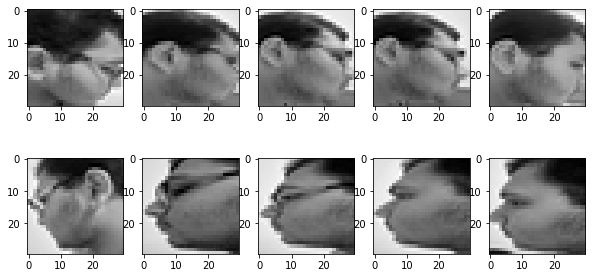

In [44]:
fig = plt.figure(figsize=(10, 5))

rows = 2
columns = 5

for i, j in enumerate(q4_grayscale_img_array_list):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(j, cmap="gray")

**Part (b)**

In [45]:

q4_w, q4_v = top_eigenvalue_eigenvector(25)

q4_eigen_coefficients = []

for i in q4_grayscale_img_flatten_list:
    eig_coff = np.dot(q4_v.T, i-mean_list)
    eig_coff = np.array(eig_coff)
    q4_eigen_coefficients.append(eig_coff)

In [46]:
print("The eigen coefficients for the 10 non-frontal using the top 25 eigen values are:")
print(q4_eigen_coefficients)

The eigen coefficients for the 10 non-frontal using the top 25 eigen values are:
[array([ 150.21589851,  399.00553831,  214.7449652 , -261.39457115,
       -458.20903387, -214.4715051 ,  152.50890049, -165.15925895,
         38.76091267,  -88.021852  ,  255.68725596, -178.32537986,
         38.06544456, -247.5467725 ,  119.55216592, -234.3367042 ,
         61.52401853, -135.44842766,  -37.49836383,  104.295752  ,
        -11.85213007,   44.52973459,    6.66056789,  133.4020156 ,
         -1.7928286 ]), array([ 315.38905475,   65.44764296,  -82.60570802, -216.83108043,
         73.22012379,  -85.42471877,  -32.02188922,  -67.35852148,
       -237.04341561, -193.04866332, -140.03583227, -147.84319384,
         54.12267442, -226.2025493 ,  111.71759226,   10.12053098,
         49.81493254, -178.87738535,   88.56434298,  141.71798123,
       -140.15059724,    3.19047912,  -14.37234958,   -7.93504502,
         48.78812099]), array([ 1.59049225e+02, -3.44140090e+01, -3.17243235e+02, -2.13131

**Part (c)**

In [47]:
q4_genuine_score = []

for i in range(10):
    for j in range(i+1,10):
        diff = q4_eigen_coefficients[i] - q4_eigen_coefficients[j]
        xsqr = np.square(diff)
        q4_genuine_score.append(np.sum(xsqr))

In [48]:
print("The Genuine score list for the face matcher is:")
print(q4_genuine_score)
print()
print("The length of the genuine score list is:", len(q4_genuine_score))

The Genuine score list for the face matcher is:
[937253.5214849145, 1477283.1220596195, 1643031.884421244, 407788.504460804, 860417.453638789, 1693936.0501921005, 1590850.1057480562, 1738547.1967591369, 1262509.665427191, 173187.0716607821, 236785.63666623377, 227243.7892749832, 1302777.7095396256, 1106316.8159918492, 1661187.4502296697, 1709284.7148920775, 1381787.1749423915, 10057.053972864152, 542797.1528520853, 1789206.5703148472, 1212470.8036517513, 2056251.503846173, 2078860.4461460204, 1822247.7529877333, 641888.6938444512, 1906609.5248339996, 1293283.2464845914, 2184410.3870665585, 2211895.6044801455, 1948710.03319907, 886677.4742223483, 1132610.4311529503, 1409455.106961375, 1496522.3633388632, 1042266.4455064613, 816556.0243804753, 740683.6784977686, 775819.9144384555, 485854.0227929583, 414362.48520078784, 345937.53939551004, 428454.3698536109, 30082.950073384764, 288359.9185227263, 268408.6713473702]

The length of the genuine score list is: 45


**Part (d)**

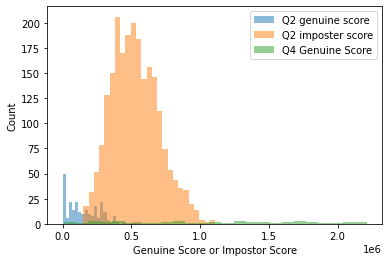

In [49]:
plt.hist(x, bins=25, label='Q2 genuine score', alpha=0.5)
plt.hist(y, bins=25, label='Q2 imposter score', alpha=0.5)
plt.hist(q4_genuine_score, bins=25, label="Q4 Genuine Score", alpha=0.5)
plt.xlabel('Genuine Score or Impostor Score')
plt.ylabel('Count')
plt.legend()
plt.show()